In [1]:
#data processing
import pandas as pd
import numpy as np

In [263]:
df = pd.read_csv("./datasets/GOOG.csv")

In [264]:
# Convert the 'Date' column to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Calculate Daily Returns
df['Daily_Return'] = df['Close'].pct_change()
# Calculate 50-day Simple Moving Average (SMA)
sma_window = 50
df['50_Day_SMA'] = df['Close'].rolling(window=sma_window).mean()
# Calculate Volatility over 50 days (rolling standard deviation)
volatility_window = 50
df['Volatility'] = df['Daily_Return'].rolling(window=volatility_window).std()


In [265]:
new_df = df.iloc[51:]
new_df.head()
df = new_df

In [266]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_Day_SMA,Volatility
Date,,,,,,,,,
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.882449,490828877,0.028273,3.252987,0.033628
2004-11-02,4.950943,4.962649,4.815451,4.853558,4.853558,455553149,-0.005917,3.295562,0.033727
2004-11-03,4.935999,5.021179,4.750942,4.773856,4.773856,557630330,-0.016421,3.338800,0.033097
2004-11-04,4.693408,4.742225,4.566633,4.600257,4.600257,578544429,-0.036365,3.378003,0.033815
2004-11-05,4.532511,4.540481,4.198015,4.217940,4.217940,796297573,-0.083108,3.408609,0.036358


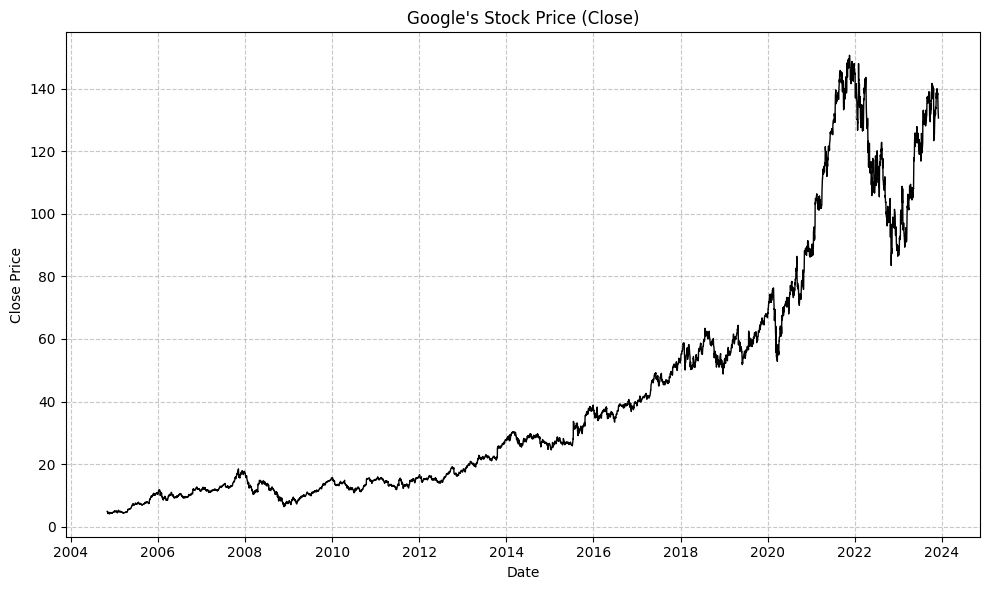

In [282]:
import matplotlib.pyplot as plt
close_prices = df['Close']

# Create a black and white plot
plt.figure(figsize=(10, 6))
plt.plot(close_prices, color='black', linewidth=1)
plt.title("Google's Stock Price (Close)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
import os
os.makedirs('x', exist_ok=True)
os.makedirs('y', exist_ok=True)

# Define the run length (60 rows in each run)
run_length = 60

# Split the DataFrame into runs of length 10
for i in range(0, len(df), run_length):
    run = df.iloc[i:i + run_length]
    
    # Check if there are at least 60 rows in the run
    if len(run) == run_length:
        # Extract 'x' (first 50 rows) and 'y' (last 50 rows)
        x = run.iloc[:50]
        y = run.iloc[50:]
        
        # Define a unique identifier for the run (you can customize this)
        run_id = f"run_{i // run_length}"
        
        # Save 'x' and 'y' as separate CSV files with unique names
        x.to_csv(os.path.join('x', f'{run_id}_x.csv'), index=False)
        y.to_csv(os.path.join('y', f'{run_id}_y.csv'), index=False)
    else:
        print(f"Skipping incomplete run starting at index {i}")

print("Splits saved in 'x' and 'y' folders.")

Skipping incomplete run starting at index 4800
Splits saved in 'x' and 'y' folders.


In [35]:
# Define the folder paths for "x" and "y" data
x_folder = 'x'
y_folder = 'y'

# Initialize lists to store "x" and "y" run data
x_runs = []
y_runs = []

# Load data from the "x" folder
for filename in os.listdir(x_folder):
    if filename.endswith('.csv'):
        x_run_data = pd.read_csv(os.path.join(x_folder, filename))
        x_runs.append(x_run_data)

# Load data from the "y" folder
for filename in os.listdir(y_folder):
    if filename.endswith('.csv'):
        y_run_data = pd.read_csv(os.path.join(y_folder, filename))
        y_runs.append(y_run_data)

# Now, x_runs and y_runs contain all the "x" and "y" run data, respectively

In [36]:
print(len(x_runs))
print(len(y_runs))

80
80


In [53]:
from sklearn.preprocessing import MinMaxScaler
x_data = x_runs[0]['Close'].values
print(x_data)
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data.reshape(1, -1)).flatten()
print(x_data)

[5.567382 5.448328 5.473982 5.465763 5.479462 5.536498 5.633634 5.691168
 5.65331  5.679213 5.6294   5.673733 5.760658 5.696648 5.709599 5.75468
 5.806486 5.956673 5.957171 6.017694 6.362402 6.376101 6.495902 6.455802
 6.625167 6.905865 7.173113 7.170623 6.980336 7.246339 7.300635 6.962901
 7.131021 7.036127 7.042354 6.932764 6.844346 6.910099 6.981332 7.140735
 7.169128 7.205492 7.215704 7.4035   7.57411  7.521806 7.290673 7.326289
 7.25406  7.365144]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
y_data = scaler.fit_transform(y_data.reshape(1, -1)).flatten()

In [57]:
def min_max_scaler(data, bias=1e-8):
    """
    Scale a 1D array to the range [bias, 1-bias].

    Parameters:
    data (numpy.ndarray or list): The input 1D array to be scaled.
    bias (float, optional): A small bias value to add to the scaled data to prevent exactly 0.

    Returns:
    numpy.ndarray: The scaled array.
    """
    # Convert input to a numpy array if it's not already
    data = np.array(data)

    # Calculate the minimum and maximum values in the data
    min_val = np.min(data)
    max_val = np.max(data)

    # Scale the data to the range [bias, 1-bias]
    scaled_data = (data - min_val) / (max_val - min_val) * (1 - 2 * bias) + bias

    return scaled_data

In [65]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
# Define ARIMA model hyperparameters
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Initialize a single ARIMA model


# Initialize lists to store ARIMA model fit results and predictions
model_fits = []
y_predictions = []
y_actuals = []
# Train the ARIMA model on "x" data and make predictions for "y" data for each run
for i in range(len(x_runs)):
# for i in range(1):
    x_run = x_runs[i]
    y_run = y_runs[i]
    
    # Extract the relevant columns (e.g., 'Close' or other features)
    x_data = x_run['Close'].values
    y_data = y_run['Close'].values
    
    scaler = MinMaxScaler()
    x_data = min_max_scaler(x_data)
    y_data = min_max_scaler(y_data)

   # Apply first-order differencing to make "x" data stationary
    x_data_diff = np.diff(x_data, n=1)
    
    # Fit the ARIMA model to differenced "x" data
    model = ARIMA(x_data_diff, order=(p, d, q))
    model_fit = model.fit()
    model_fits.append(model_fit)
    
    y_pred = model_fit.forecast(steps=len(y_data))
    y_pred = min_max_scaler(y_pred)
    y_predictions.append(y_pred)
    y_actuals.append(y_data)
    # Print the predicted values and actual values for comparison
    # print(f"Predicted for Run {i} (Length 10): {y_pred}")
    # print(f"Actual for Run {i} (Length 10): {y_data}")
    # print("="*30)

/Users/michaelmarcotte/miniconda3/envs/CS236Project/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
def compute_rmse(y_preds, y_reals):
    # Check if the input arrays have the same length
    if len(y_preds) != len(y_reals):
        raise ValueError("Input arrays must have the same length.")

    # Compute the squared differences between predicted and real values
    squared_errors = (y_preds - y_reals) ** 2

    # Calculate the mean squared error
    mean_squared_error = np.mean(squared_errors)

    # Compute the RMSE by taking the square root of the mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [167]:
y_preds = np.array(y_predictions)
y_reals = np.array(y_actuals)
rmse = compute_rmse(y_preds, y_reals)
print(f"RMSE: {rmse}")

RMSE: 0.5600186607227182


In [67]:
from scipy.stats import entropy
kl_divergences = []

y_preds = y_predictions
y_reals = y_actuals

# Compute KL divergence for each pair of predicted and real distributions
for y_pred, y_real in zip(y_preds, y_reals):
    # Ensure that the distributions sum to 1
    y_pred = y_pred / np.sum(y_pred)
    y_real = y_real / np.sum(y_real)
    
    # Compute KL divergence
    kl_div = entropy(y_real, y_pred)
    kl_divergences.append(kl_div)

# Compute the average KL divergence
average_kl_divergence = np.mean(kl_divergences)

print(f"Average KL Divergence: {average_kl_divergence}")

Average KL Divergence: 3.2934386761299868


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim

In [70]:
#Basic Generator + Discriminator
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [71]:
# Training parameters
input_dim = 10  # Sequence length for the generator
hidden_dim = 64
learning_rate = 0.001
num_epochs = 1000
batch_size = 32

In [72]:
# Create generator and discriminator models
generator = Generator(input_dim, hidden_dim, input_dim)
discriminator = Discriminator(input_dim, hidden_dim)

In [73]:
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)


In [75]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        return out

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [89]:
#jitter 
import random
def jittered_series(series, var=0.1):
    noise = np.random.normal(0, var, series.shape)
    return series + noise

#jitter times series:
def data_augmentation(x_runs, y_runs, target_size = 1000):
    new_runs_x = x_runs.copy()
    new_runs_y = y_runs.copy()
    while len(new_runs_x) < target_size:
        i = random.randint(0,len(x_runs)-1)
        new_runs_x.append(jittered_series(x_runs[i]))
        new_runs_y.append(jittered_series(y_runs[i]))
    
    return new_runs_x, new_runs_y
        


In [90]:
print(type(x_runs))

<class 'list'>


In [91]:
new_runs_x, new_runs_y = data_augmentation(x_runs,y_runs)


In [97]:
print(type(new_runs_x[0]))

<class 'pandas.core.frame.DataFrame'>


In [93]:
import torch
import torch.nn as nn
import torch.optim as optim

In [94]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        return out

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [95]:
# Create instances of the Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

# Define loss functions and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.001)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.001)

# Training loop
batch_size = 32
num_epochs = len(new_runs_x) // batch_size

In [100]:
for epoch in range(num_epochs):
    # Generate a batch of random noise or select a batch from your dataset
    noise = torch.randn(batch_size, 50, 1)
    real_samples = torch.tensor(np.array(new_runs_x[batch_size * epoch : batch_size * (epoch + 1)]))  # Select a batch of real sequences from your dataset
    
    # Generate fake samples from the generator
    generated_samples = generator(noise)
    
    # Create labels for real and fake samples
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)
    
    # Train the discriminator
    optimizer_d.zero_grad()
    d_loss_real = criterion(discriminator(real_samples), real_labels)
    d_loss_fake = criterion(discriminator(generated_samples.detach()), fake_labels)
    d_loss = 0.5 * (d_loss_real + d_loss_fake)
    d_loss.backward()
    optimizer_d.step()
    
    # Train the generator
    optimizer_g.zero_grad()
    g_loss = criterion(discriminator(generated_samples), real_labels)
    g_loss.backward()
    optimizer_g.step()
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1600x9 and 1x256)

class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [107]:
df = pd.read_csv("datasets/GOOG.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df_filtered = df['Close']

In [108]:
# Split the closing prices into runs of 60 consecutive prices
window_size = 60
runs = []
for i in range(len(df_filtered) - window_size + 1):
    run = df_filtered[i:i + window_size]
    runs.append(run)

# 'runs' is now a list of NumPy arrays, each containing 60 consecutive closing prices
# You can convert it to a NumPy array if needed
runs = np.array(runs)

In [109]:
print(runs.shape)

(4798, 60)


In [112]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate some synthetic data (replace with your actual data)
data = runs  # 4k sequences of 60 elements

# Split data into input and target sequences
input_seq = data[:, :50]
target_seq = data[:, 50:]

# Convert data to PyTorch tensors
input_seq = torch.Tensor(input_seq)
target_seq = torch.Tensor(target_seq)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -10:, :])  # Predict the last 10 time steps
        return out

input_size = 1  # Number of features in each time step
hidden_size = 64  # Number of hidden units in the LSTM layer
output_size = 10  # Number of values to predict

model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
total_epochs = 100  # Total number of epochs
print_interval = 10  # Print loss every 50 epochs
for epoch in range(total_epochs):
    optimizer.zero_grad()
    outputs = model(input_seq.unsqueeze(2))  # Add a channel dimension
    loss = criterion(outputs, target_seq.unsqueeze(2))  # Add a channel dimension
    loss.backward()
    optimizer.step()

    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{total_epochs}], Loss: {loss.item()}')


# Make predictions for a new input sequence
new_input_sequence = input_seq[0:1]  # Replace with your own input data
with torch.no_grad():
    predictions = model(new_input_sequence.unsqueeze(2))
    print(predictions.squeeze().numpy())

Epoch [10/100], Loss: 3215.99365234375
Epoch [20/100], Loss: 3188.654052734375
Epoch [30/100], Loss: 3152.5966796875
Epoch [40/100], Loss: 3105.016845703125
Epoch [50/100], Loss: 3038.600830078125
Epoch [60/100], Loss: 2953.397705078125
Epoch [70/100], Loss: 2870.7783203125
Epoch [80/100], Loss: 2796.012451171875
Epoch [90/100], Loss: 2724.712890625
Epoch [100/100], Loss: 2665.376708984375
[[7.5217676 8.451883  7.590777  7.0805073 7.429283  7.3067126 6.6383314
  8.020854  8.245783  6.5269904]
 [7.5221477 8.453182  7.5914683 7.0808153 7.429539  7.3071065 6.639172
  8.021741  8.246562  6.5273576]
 [7.522144  8.453164  7.5915093 7.080778  7.4294624 7.3070955 6.6390715
  8.021704  8.246528  6.5273614]
 [7.521743  8.451593  7.5907626 7.080399  7.4290886 7.306629  6.6379256
  8.020629  8.245574  6.52697  ]
 [7.5223536 8.453455  7.591715  7.080921  7.429599  7.3072333 6.6392393
  8.021959  8.246742  6.527525 ]
 [7.5236545 8.458711  7.5943522 7.0820813 7.4306035 7.308752  6.6428537
  8.025503 

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
def manual_min_max_scaler(data, feature_range=(0, 1), axis=1):
    """
    Manually scale the data to the specified feature range along the specified axis.

    Parameters:
        - data: NumPy array containing the data to be scaled.
        - feature_range: Tuple (min, max) specifying the desired feature range after scaling.
        - axis: Axis along which to scale the data (default is 1, scaling along rows).

    Returns:
        - scaled_data: Scaled data array.
    """
    min_val = np.min(data, axis=axis, keepdims=True)
    max_val = np.max(data, axis=axis, keepdims=True)
    
    min_range, max_range = feature_range
    
    scaled_data = min_range + (data - min_val) * (max_range - min_range) / (max_val - min_val)
    
    return scaled_data

In [183]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max scaling to each row
scaled_runs = np.empty_like(runs)
for i in range(runs.shape[0]):
    row = runs[i, :].reshape(1, -1)  # Reshape to a 2D array for the scaler
    scaled_row = manual_min_max_scaler(row)
    scaled_runs[i, :] = scaled_row

In [184]:
print(scaled_runs[0])
print(runs[0])

[0.00343712 0.08644068 0.09779238 0.05061475 0.06238292 0.08227474
 0.0639451  0.02082929 0.02457835 0.00249965 0.01562176 0.
 0.016351   0.02384953 0.02395364 0.0554054  0.07800468 0.11955873
 0.12486996 0.14538648 0.18204576 0.2015207  0.1856907  0.19131429
 0.21672599 0.20641546 0.19006488 0.27962949 0.32357865 0.30816513
 0.33920041 0.36502817 0.39950015 0.38606569 0.40449903 0.39283498
 0.36711135 0.38939828 0.42584891 0.43730473 0.45927931 0.5118727
 0.49916706 0.42157885 0.5141637  0.75421821 0.91012303 0.85180194
 0.89523051 0.97156848 0.9438662  1.         0.98791948 0.95459278
 0.88200387 0.72214134 0.75546762 0.71537205 0.70662369 0.86450758]
[2.499133 2.697639 2.724787 2.61196  2.640104 2.687676 2.64384  2.540727
 2.549693 2.496891 2.528273 2.490913 2.530017 2.54795  2.548199 2.623417
 2.677464 2.776842 2.789544 2.83861  2.926282 2.972857 2.934999 2.948448
 3.009221 2.984563 2.94546  3.159657 3.264763 3.227901 3.302123 3.363891
 3.446332 3.414203 3.458287 3.430392 3.368873 

In [258]:
num_test_runs = 500
runs = scaled_runs
train_runs = runs[:-num_test_runs]
test_runs = runs[-num_test_runs:]
#get rid of overlap
test_runs = test_runs[60:]

In [186]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate some synthetic data (replace with your actual data)
data = train_runs  # 4k sequences of 60 elements

# Split data into input and target sequences
input_seq = data[:, :50]
target_seq = data[:, 50:]

# Convert data to PyTorch tensors and move to GPU
input_seq = torch.Tensor(input_seq).to(device)
target_seq = torch.Tensor(target_seq).to(device)

# Define the RNN model and move it to GPU
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -10:, :])  # Predict the last 10 time steps
        return out

input_size = 1  # Number of features in each time step
hidden_size = 64  # Number of hidden units in the LSTM layer
output_size = 1  # Number of values to predict

model = RNN(input_size, hidden_size, output_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
total_epochs = 1000  # Total number of epochs
print_interval = 10  # Print loss every 50 epochs

for epoch in range(total_epochs):
    optimizer.zero_grad()
    outputs = model(input_seq.unsqueeze(2))  # Add a channel dimension
    loss = criterion(outputs, target_seq.unsqueeze(2))  # Add a channel dimension
    loss.backward()
    optimizer.step()

    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{total_epochs}], Loss: {loss.item()}')

# Make predictions for a new input sequence (move to GPU)
new_input_sequence = input_seq[0:1].to(device)  # Replace with your own input data
with torch.no_grad():
    predictions = model(new_input_sequence.unsqueeze(2))
    print(predictions.squeeze().cpu().numpy())  # Move predictions back to CPU for printing


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [187]:


print(test_runs.shape)
print(train_runs.shape)

(440, 60)
(4298, 60)


In [188]:
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Assuming 'test_runs' is a numpy array of shape (num_samples, sequence_length)
num_samples, sequence_length = test_runs.shape
batch_size = 32  # Adjust batch size based on your GPU memory

# Initialize an empty list to store KL divergences
kl_divergences = []
y_preds = []
y_reals = []
# Set the model to evaluation mode
model.eval()

# Process data in batches
for i in range(0, num_samples, batch_size):
    # Take a batch of input sequences
    input_batch = test_runs[i:i+batch_size, :50]
    target_batch = test_runs[i:i+batch_size, 50:]

    # Convert the batch to a PyTorch tensor and move to GPU
    input_batch = torch.Tensor(input_batch).to(device)

    # Predict the next 10 entries for the batch
    with torch.no_grad():
        batch_predictions = model(input_batch.unsqueeze(2))

    # Extract the predicted values and convert to a numpy array
    batch_predictions = batch_predictions.squeeze().cpu().numpy()
    # Calculate the KL divergence for each sequence in the batch
    for j in range(batch_predictions.shape[0]):
        y_reals.append(manual_min_max_scaler(target_batch[j].reshape(1, -1)).squeeze())
        y_preds.append(manual_min_max_scaler(batch_predictions[j].reshape(1, -1)).squeeze())

y_preds = np.array(y_preds)
y_actuals = np.array(y_actuals)
# Calculate the average KL divergence
rmse = compute_rmse(y_preds, y_reals)

print(f"RMSE: {rmse}")


[[51.86801  51.86801  51.86802  51.86801  51.86799  51.867996 51.868
  51.868004 51.867977 51.86797 ]
 [51.86801  51.86802  51.86801  51.86799  51.867996 51.868    51.868004
  51.867977 51.86797  51.867966]
 [51.86802  51.86801  51.86799  51.867996 51.868    51.868004 51.867977
  51.86797  51.867966 51.867954]
 [51.86801  51.86799  51.867996 51.868    51.868004 51.867977 51.86797
  51.867966 51.867954 51.86798 ]
 [51.86799  51.867996 51.868    51.868004 51.867977 51.86797  51.867966
  51.867954 51.86798  51.86799 ]
 [51.867996 51.868    51.868004 51.867977 51.86797  51.867966 51.867954
  51.86798  51.86799  51.867992]
 [51.868    51.868004 51.867977 51.86797  51.867966 51.867954 51.86798
  51.86799  51.867992 51.86799 ]
 [51.868004 51.867977 51.86797  51.867966 51.867954 51.86798  51.86799
  51.867992 51.86799  51.86799 ]
 [51.867977 51.86797  51.867966 51.867954 51.86798  51.86799  51.867992
  51.86799  51.86799  51.86799 ]
 [51.86797  51.867966 51.867954 51.86798  51.86799  51.867992

In [259]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Data Preprocessing: Load and preprocess your time series data
# Assume train_data is a torch tensor of shape (num_samples, sequence_length)

# Model Architecture
input_dim = 50  # Input dimension for the first 50 elements
output_dim = 10  # Output dimension for the next 10 elements
latent_dim = 100  # Latent space dimension
num_diffusion_steps = 50  # Number of diffusion steps
noise_dim = 50  # Noise dimension

# Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc_mean = nn.Linear(32, latent_dim)
        self.fc_log_var = nn.Linear(32, latent_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        mean = self.fc_mean(x)
        log_var = self.fc_log_var(x)
        return mean, log_var

# Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + input_dim, 32)  # Conditioned on input_dim
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, output_dim)

    def forward(self, x, condition):
        x = torch.cat((x, condition), dim=1)  # Concatenate with conditioning input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        output = self.fc4(x)
        return output

# Define the full DVAE model
class DVAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(DVAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x, condition):
        mean, log_var = self.encoder(x)
        z = self.reparameterize(mean, log_var)
        output = self.decoder(z, condition)
        return output, mean, log_var

    def reparameterize(self, mean, log_var):
        epsilon = torch.randn_like(log_var)
        z = mean + epsilon * torch.exp(0.5 * log_var)
        return z

# Loss Function
def dvae_loss(y_true, y_pred, mean, log_var):
    # Reconstruction loss (e.g., mean squared error)
    reconstruction_loss = nn.MSELoss()(y_true, y_pred)
    
    # KL divergence regularization
    kl_loss = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    
    return reconstruction_loss + kl_loss

# Create DataLoader for training data
train_data = torch.Tensor(train_runs)
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


# Initialize the DVAE model
encoder = Encoder()
decoder = Decoder()
dvae_model = DVAE(encoder, decoder)

# Optimizer
optimizer = optim.Adam(dvae_model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = batch[:, :input_dim]
        y_real = batch[:, input_dim:]
        # Unpack a single value (input) from the batch
        outputs, mean, log_var = dvae_model(inputs,inputs[:, :input_dim]) #condition on input
        loss = dvae_loss(y_real, outputs, mean, log_var)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')




Epoch [1/50], Loss: 6.200949668884277
Epoch [2/50], Loss: 4.02882719039917
Epoch [3/50], Loss: 2.045105218887329
Epoch [4/50], Loss: 1.081794023513794
Epoch [5/50], Loss: 0.48753541707992554
Epoch [6/50], Loss: 0.22574582695960999
Epoch [7/50], Loss: 0.1439274549484253
Epoch [8/50], Loss: 0.11046643555164337
Epoch [9/50], Loss: 0.07149099558591843
Epoch [10/50], Loss: 0.055529192090034485
Epoch [11/50], Loss: 0.06075111776590347
Epoch [12/50], Loss: 0.038709573447704315
Epoch [13/50], Loss: 0.06506863236427307
Epoch [14/50], Loss: 0.046630993485450745
Epoch [15/50], Loss: 0.04317566007375717
Epoch [16/50], Loss: 0.03419336676597595
Epoch [17/50], Loss: 0.018569186329841614
Epoch [18/50], Loss: 0.0457301028072834
Epoch [19/50], Loss: 0.06102032959461212
Epoch [20/50], Loss: 0.054959215223789215
Epoch [21/50], Loss: 0.025662394240498543
Epoch [22/50], Loss: 0.0377197228372097
Epoch [23/50], Loss: 0.040031421929597855
Epoch [24/50], Loss: 0.02927214652299881
Epoch [25/50], Loss: 0.0674789

In [260]:
def sample_from_dvae_conditioned(condition, num_samples):
    z = torch.randn(num_samples, latent_dim)
    generated_samples = decoder(z, condition)
    return generated_samples

In [261]:
def generate_sequences_and_compute_rmse(model, data):
    num_samples = data.shape[0]
    generated_sequences = []

    for i in range(num_samples):
        condition = data[i, :input_dim]  # First 50 elements as condition
        condition_tensor = torch.Tensor(condition).unsqueeze(0)
        generated_sequence = sample_from_dvae_conditioned(condition_tensor, 1)
        generated_sequences.append(generated_sequence.detach().numpy())

    generated_sequences = np.concatenate(generated_sequences, axis=0)
    return generated_sequences

# Sample sequences and compute RMSE
generated_data = generate_sequences_and_compute_rmse(dvae_model, test_runs)
y_real = test_runs[:, -output_dim:]  # Extract ground truth (last 10 elements)

# Compute RMSE
print(y_real.shape)
print(generated_data.shape)
rmse = compute_rmse(y_real, generated_data)
print(f'RMSE: {rmse}')

(440, 10)
(440, 10)
RMSE: 0.22205814281205444


[0.25499222 0.22523412 0.23527943 0.24689758 0.25426063 0.2780749
 0.24748331 0.24024345 0.25287753 0.24196447]
[0.13227958 0.05044906 0.27955207 0.3626663  0.37939285 0.34684037
 0.37311154 0.35314369 0.25472156 0.        ]
[1.         0.         0.02742087 0.02666896 0.02668958 0.02668901
 0.02668903 0.02668903 0.02668903 0.02668903]


In [257]:
print(generated_data[0])
print(test_runs[0])
print(y_real[0])

[139.10176 139.15416 139.92508 139.52422 139.60884 139.75645 140.37543
 140.12645 140.96762 140.5033 ]
[148.106003 148.675003 146.704498 144.970505 147.3685   144.838501
 142.802994 142.401505 144.220505 146.949005 147.142502 148.063995
 146.447998 146.504501 146.002502 144.679504 145.074493 144.416504
 137.653503 137.550995 137.004501 138.574005 140.017502 141.647995
 139.130997 139.786499 136.290497 135.651993 133.5065   130.091995
 130.371994 126.735497 129.240005 129.121002 133.289505 135.698502
 137.878494 148.036499 142.650497 143.016006 138.938004 139.212997
 141.453003 138.602493 134.130005 135.300003 136.425507 137.487503
 132.308502 130.467499 129.402496 127.584999 132.673492 134.519501
 134.891006 134.167999 134.751495 134.307999 132.121994 126.4645  ]
tensor([11.7467, 11.5475, 11.6127, 11.6341, 11.0812, 10.8705,  9.9492, 10.6476,
        11.0344, 10.7846])


In [251]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
# Define ARIMA model hyperparameters
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Initialize a single ARIMA model


# Initialize lists to store ARIMA model fit results and predictions
model_fits = []
y_predictions = []
y_actuals = []
x_runs=test_runs[:,:input_dim]
y_runs = test_runs[:,input_dim:]
# Train the ARIMA model on "x" data and make predictions for "y" data for each run
for i in range(len(x_runs)):
# for i in range(1):
    x_run = x_runs[i]
    y_run = y_runs[i]
    
    # Extract the relevant columns (e.g., 'Close' or other features)
    x_data = x_run
    y_data = y_run
    
    scaler = MinMaxScaler()
    x_data = min_max_scaler(x_data)
    y_data = min_max_scaler(y_data)

   # Apply first-order differencing to make "x" data stationary
    x_data_diff = np.diff(x_data, n=1)
    
    # Fit the ARIMA model to differenced "x" data
    model = ARIMA(x_data_diff, order=(p, d, q))
    model_fit = model.fit()
    model_fits.append(model_fit)
    
    y_pred = model_fit.forecast(steps=len(y_data))
    y_pred = manual_min_max_scaler(y_pred,axis = 0)
    y_predictions.append(y_pred)
    y_actuals.append(manual_min_max_scaler(y_data,axis = 0))
    # Print the predicted values and actual values for comparison
    # print(f"Predicted for Run {i} (Length 10): {y_pred}")
    # print(f"Actual for Run {i} (Length 10): {y_data}")
    # print("="*30)

In [252]:
print(y_pred)
print(y_data)

[0.         0.98354232 0.99972914 0.99999554 0.99999993 1.
 1.         1.         1.         1.        ]
[7.76357159e-01 8.50904237e-01 9.99999990e-01 8.08306363e-01
 7.90202208e-01 8.50904237e-01 6.14482385e-01 3.50372032e-01
 2.86475221e-01 1.00000000e-08]


In [277]:
arima_samples = []
diffusion_samples = generated_data[0:3]
gan_samples = y_preds[0:3]
real_samples = y_real[0:3]
for i in range(3):
# for i in range(1):
    x_run = x_runs[i]
    y_run = y_runs[i]
    
    # Extract the relevant columns (e.g., 'Close' or other features)
    x_data = x_run
    y_data = y_run
    
    scaler = MinMaxScaler()
    x_data = min_max_scaler(x_data)
    y_data = min_max_scaler(y_data)

   # Apply first-order differencing to make "x" data stationary
    x_data_diff = np.diff(x_data, n=1)
    
    # Fit the ARIMA model to differenced "x" data
    model = ARIMA(x_data_diff, order=(p, d, q))
    model_fit = model.fit()
    model_fits.append(model_fit)
    
    y_pred = model_fit.forecast(steps=len(y_data))
    y_pred = manual_min_max_scaler(y_pred,axis = 0)
    y_predictions.append(y_pred)
    y_actuals.append(manual_min_max_scaler(y_data,axis = 0))
    # Print the predicted values and actual values for comparison
    # print(f"Predicted for Run {i} (Length 10): {y_pred}")
    # print(f"Actual for Run {i} (Length 10): {y_data}")
    # print("="*30)
    arima_samples.append(y_pred)



In [278]:
for i in range(len(diffusion_samples)):
    diffusion_samples[i] = manual_min_max_scaler(diffusion_samples[i],axis=0)
    real_samples[i] = manual_min_max_scaler(real_samples[i],axis=0)

In [280]:
print(gan_samples)

[[1.         0.         0.02742087 0.02666896 0.02668958 0.02668901
  0.02668903 0.02668903 0.02668903 0.02668903]
 [1.         0.         0.02073114 0.02030136 0.02031027 0.02031009
  0.02031009 0.02031009 0.02031009 0.02031009]
 [1.         0.         0.02384223 0.02327378 0.02328734 0.02328701
  0.02328702 0.02328702 0.02328702 0.02328702]]


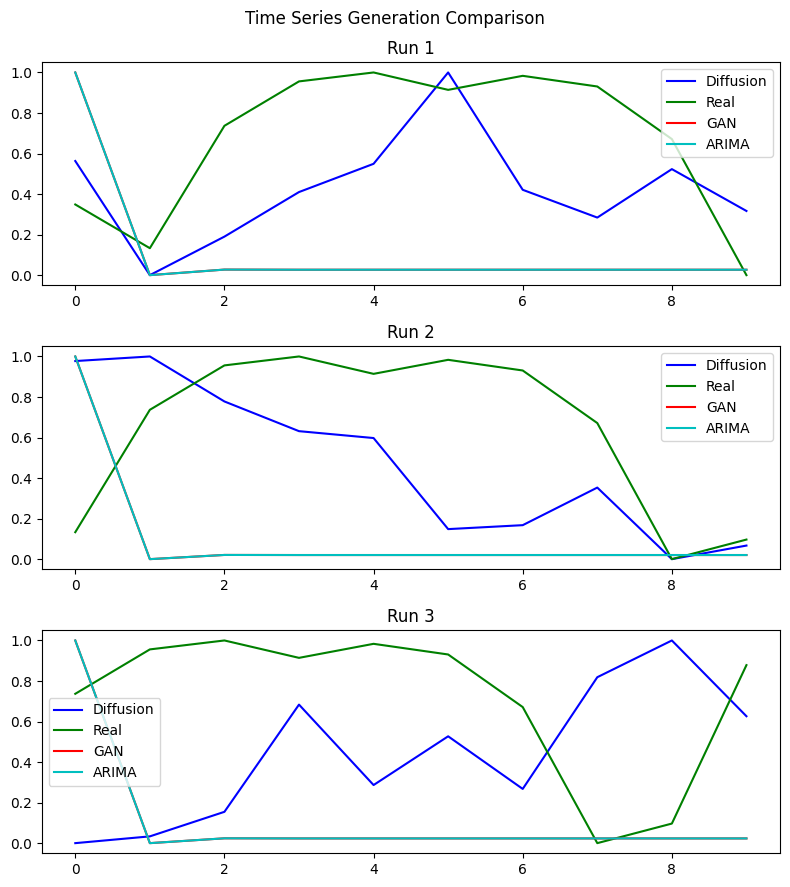

In [281]:
import matplotlib.pyplot as plt
model_colors = {
    'Diffusion': 'b',
    'Real': 'g',
    'GAN': 'r',
    'ARIMA': 'c',
}

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 9))

# Plot each array with the same color scheme
for i in range(3):
    axes[i].plot(diffusion_samples[i], label='Diffusion', color=model_colors['Diffusion'])
    axes[i].plot(real_samples[i], label='Real', color=model_colors['Real'])
    axes[i].plot(gan_samples[i], label='GAN', color=model_colors['GAN'])
    axes[i].plot(arima_samples[i], label='ARIMA', color=model_colors['ARIMA'])
    axes[i].set_title(f'Run {i + 1}')
    axes[i].legend()

# Add overall title
plt.suptitle('Time Series Generation Comparison')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [276]:
diffusion_sample = manual_min_max_scaler(generated_data[0], axis = 0)
real_sample = manual_min_max_scaler(y_real[0], axis = 0)
gan_sample = y_preds[0]
arima_sample = y_pred
print(diffusion_sample)
print(real_sample)
print(gan_sample)
print(arima_sample)

[0.5631654  0.         0.1901052  0.40997618 0.54932034 1.
 0.4210611  0.28404826 0.52314556 0.31661826]
[0.34866124 0.13297314 0.73684063 0.95591233 1.         0.91419848
 0.98344379 0.93081272 0.67139263 0.        ]
[1.         0.         0.02742087 0.02666896 0.02668958 0.02668901
 0.02668903 0.02668903 0.02668903 0.02668903]
[0.         0.98354232 0.99972914 0.99999554 0.99999993 1.
 1.         1.         1.         1.        ]


In [253]:
y_preds = np.array(y_predictions)
y_reals = np.array(y_actuals)
rmse = compute_rmse(y_preds, y_reals)
print(f"RMSE: {rmse}")

RMSE: 0.5800508989649863


In [ ]:
# Sampling: Generate synthetic time series data
def sample_from_dvae(num_samples):
    z = torch.randn(num_samples, latent_dim)
    generated_samples = decoder(z)
    return generated_samples

# Example usage:
num_samples = 10
generated_data = sample_from_dvae(num_samples)
print(generated_data)

In [191]:
print(type(train_data))

<class 'numpy.ndarray'>


In [161]:
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Assuming 'test_runs' is a numpy array of shape (num_samples, sequence_length)
num_samples, sequence_length = test_runs.shape
batch_size = 32  # Adjust batch size based on your GPU memory

# Initialize an empty list to store KL divergences
kl_divergences = []
y_preds = []
y_reals = []
# Set the model to evaluation mode
model.eval()

# Process data in batches
for i in range(0, num_samples, batch_size):
    # Take a batch of input sequences
    input_batch = test_runs[i:i+batch_size, :50]
    target_batch = test_runs[i:i+batch_size, 50:]

    # Convert the batch to a PyTorch tensor and move to GPU
    input_batch = torch.Tensor(input_batch).to(device)

    # Predict the next 10 entries for the batch
    with torch.no_grad():
        batch_predictions = model(input_batch.unsqueeze(2))

    # Extract the predicted values and convert to a numpy array
    batch_predictions = batch_predictions.squeeze().cpu().numpy()
    # Calculate the KL divergence for each sequence in the batch
    for j in range(batch_predictions.shape[0]):
        kl_divergence = scipy.stats.entropy(scaler.fit_transform(target_batch[j].reshape(1, -1)).squeeze(), scaler.fit_transform(batch_predictions[j].reshape(1, -1)).squeeze())
        kl_divergences.append(kl_divergence)

# Calculate the average KL divergence
average_kl_divergence = np.mean(kl_divergences)

print(f"Average KL Divergence: {average_kl_divergence}")


Average KL Divergence: nan


In [139]:
import scipy.stats
num_samples, sequence_length = test_runs.shape

total_kl_divergence = 0.0

for i in range(num_samples):
    # Take the first 50 entries as input
    print(test_runs[i])
    input_sequence = torch.Tensor(test_runs[i])

    # Predict the next 10 entries
    with torch.no_grad():
        predicted_sequence = model(input_sequence)
    print("Predicted Sequence")
    print(predicted_sequence)
    # Extract the predicted values and convert to a numpy array
    predicted_values = predicted_sequence.squeeze().cpu().numpy()
    print("Predicted Vals")
    print(predicted_values.shape)
    print(predicted_values)
    # Take the real last 10 entries as the target
    real_values = test_runs[i, 50:]
    print("Real Vals")
    print(real_values)
    # Calculate the KL divergence between real and predicted data
    kl_divergence = scipy.stats.entropy(real_values, predicted_values)
    total_kl_divergence += sum(kl_divergence)

# Calculate the average KL divergence over all samples
average_kl_divergence = total_kl_divergence / num_samples

print(f"Average KL Divergence: {average_kl_divergence}")

[148.106003 148.675003 146.704498 144.970505 147.3685   144.838501
 142.802994 142.401505 144.220505 146.949005 147.142502 148.063995
 146.447998 146.504501 146.002502 144.679504 145.074493 144.416504
 137.653503 137.550995 137.004501 138.574005 140.017502 141.647995
 139.130997 139.786499 136.290497 135.651993 133.5065   130.091995
 130.371994 126.735497 129.240005 129.121002 133.289505 135.698502
 137.878494 148.036499 142.650497 143.016006 138.938004 139.212997
 141.453003 138.602493 134.130005 135.300003 136.425507 137.487503
 132.308502 130.467499 129.402496 127.584999 132.673492 134.519501
 134.891006 134.167999 134.751495 134.307999 132.121994 126.4645  ]


ValueError: LSTM: Expected input to be 2D or 3D, got 1D instead